## Genetic Algorithm

This notebook is for ISP611 that utilized Genetic Algorithm to optimize waste collection route  for Sopela which is one of district in Spain .

The data is obtained from the article
*   Modeling the Municipal Waste Collection Using Genetic Algorithm
*   link : doi:10.3390/pr8050513



## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from dataclasses import dataclass
import colorama
from colorama import Fore, Style

In [ ]:
!pip -qq install colorama

## **Genetic Algorithm Coding**

Streaming output truncated to the last 5000 lines.
No mutation occurred.
Parent 1:
  Route: [1, 5, 8, 6, 29, 20, 21, 24, 19, 18, 12, 13, 16, 23, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1]
  Distance: 22.10
Parent 2:
  Route: [1, 5, 8, 6, 29, 20, 21, 24, 19, 18, 12, 13, 16, 23, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1]
  Distance: 22.10
Crossover Details:
  Crossover Method: Ordered Crossover
  Crossover Result (Child): [1, 5, 8, 6, 29, 20, 21, 24, 19, 18, 12, 13, 16, 23, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1]
  Child Distance: 22.10
No mutation occurred.
Parent 1:
  Route: [1, 5, 8, 6, 29, 20, 21, 24, 19, 18, 12, 13, 16, 23, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1]
  Distance: 22.10
Parent 2:
  Route: [1, 5, 8, 6, 29, 20, 21, 24, 19, 18, 12, 13, 16, 23, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1]
  Distance: 22.10
Crossover Details:
  Crossover Method: Ordered Crossover
  Crossover Result (Child): [1, 5, 8

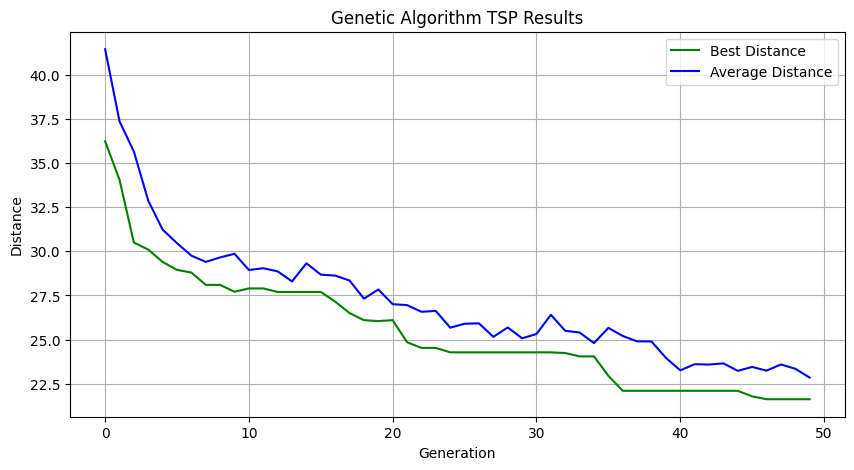

Best Route: [1, 5, 8, 6, 29, 19, 21, 24, 23, 18, 12, 13, 16, 20, 26, 22, 28, 27, 14, 25, 7, 9, 10, 17, 15, 11, 4, 3, 2, 1], Best Distance: 21.62


In [ ]:
# Initialize colorama for colored output
colorama.init(autoreset=True)

@dataclass
class GAConfig:
    population_size: int =30
    generations: int = 50
    mutation_rate: float = 0.5
    tournament_size: int = 15

class GeneticAlgorithmTSP:
    def __init__(self, distance_matrix, config=None):
        """Initialize Genetic Algorithm for Traveling Salesman Problem"""
        self.config = config if config else GAConfig()
        self.distance_matrix = distance_matrix
        self.num_locations = len(distance_matrix)

        # For visualization
        self.best_routes_per_generation = []
        self.best_distances_per_generation = []
        self.average_distances_per_generation = []

    def color_fitness_score(self, fitness_score):
        """Assign color based on fitness score"""
        if fitness_score > 0.025:
            return Fore.GREEN
        elif fitness_score > 0.02:
            return Fore.YELLOW
        else:
            return Fore.RED

    def create_initial_population(self):
        """Create initial population of routes"""
        population = []
        for _ in range(self.config.population_size):
            route = [1]  # Start with location 1
            remaining_locations = list(range(2, self.num_locations + 1))
            random.shuffle(remaining_locations)
            route.extend(remaining_locations)
            route.append(1)  # End at location 1
            population.append(route)
        return population

    def calculate_route_distance(self, route):
        """Calculate total distance of a route"""
        total_distance = 0
        for i in range(len(route) - 1):
            from_location = route[i] - 1
            to_location = route[i + 1] - 1
            total_distance += self.distance_matrix.iloc[from_location, to_location]
        return total_distance

    def fitness_function(self, population):
        """Calculate fitness for each route"""
        return [1 / self.calculate_route_distance(route) for route in population]

    def tournament_selection(self, population, fitness):
        """Tournament selection method to select the two best parents"""
        selected_parents = []
        for _ in range(2):  # Run the tournament twice to select two parents
            tournament = random.sample(list(zip(population, fitness)),
                                        self.config.tournament_size)
            winner = max(tournament, key=lambda x: x[1])[0]  # Select the individual with the highest fitness
            selected_parents.append(winner)
        return selected_parents

    def ordered_crossover(self, parent1, parent2):
        """Ordered Crossover"""
        start = random.randint(1, len(parent1) - 2)
        end = random.randint(start + 1, len(parent1) - 1)

        # Initialize child
        child = [0] * len(parent1)
        child[0] = child[-1] = 1  # Start and end fixed for TSP

        # Copy the subsequence from parent1
        child[start:end] = parent1[start:end]

        # Get remaining genes from parent2
        remaining_genes = [gene for gene in parent2 if gene not in child]

        # Fill the rest of the child
        j = 0
        for i in range(1, len(child) - 1):
            if child[i] == 0:
                child[i] = remaining_genes[j]
                j += 1

        return child

    def swap_mutation(self, route):
        """Swap mutation method"""
        if random.random() < self.config.mutation_rate:
            idx1, idx2 = random.sample(range(1, len(route) - 1), 2)
            original = route[:]
            route[idx1], route[idx2] = route[idx2], route[idx1]
            return route, f"Mutation occurred: {original} -> {route}"
        return route, "No mutation occurred."

    def run(self):
        """Run the Genetic Algorithm"""
        # Initialize population
        population = self.create_initial_population()

        # Print initial population
        print(f"{Fore.CYAN}Initial Population:{Style.RESET_ALL}")
        for i, route in enumerate(population, 1):
            distance = self.calculate_route_distance(route)
            print(f"Route {i}: {route} (Distance: {distance:.2f})")

        for generation in range(self.config.generations):
            print(f"\n{Fore.CYAN}Generation {generation + 1}:{Style.RESET_ALL}")

            # Calculate fitness
            fitness = self.fitness_function(population)

            # Sort routes by fitness
            sorted_routes = sorted(zip(population, fitness), key=lambda x: x[1], reverse=True)

            print(f"{Fore.MAGENTA}Fitness Scores (Ranked):{Style.RESET_ALL}")
            for rank, (route, fitness_score) in enumerate(sorted_routes, 1):
                route_distance = self.calculate_route_distance(route)
                color = self.color_fitness_score(fitness_score)

                print(f"Rank {rank}:")
                print(f"  - Route: {route}")
                print(f"  - Distance: {route_distance:.2f}")
                print(f"  - {color}Fitness Score: {fitness_score:.4f}{Style.RESET_ALL}")
                print(f"  - Normalized Fitness: {fitness_score / sum(fitness) * 100:.2f}%\n")

            # Find the shortest route in this generation
            route_distances = [self.calculate_route_distance(route) for route in population]
            shortest_distance = min(route_distances)
            shortest_route_index = route_distances.index(shortest_distance)
            shortest_route = population[shortest_route_index]

            # Print shortest route information
            print(f"{Fore.GREEN}Shortest Route: {shortest_route}{Style.RESET_ALL}")
            print(f"{Fore.GREEN}Shortest Distance: {shortest_distance:.2f}{Style.RESET_ALL}")

            # Track best route and distance for this generation
            best_route_idx = fitness.index(max(fitness))
            best_route = population[best_route_idx]
            best_distance = self.calculate_route_distance(best_route)

            # Store best routes and distances for visualization
            self.best_routes_per_generation.append(best_route)
            self.best_distances_per_generation.append(best_distance)
            self.average_distances_per_generation.append(
                sum(self.calculate_route_distance(route) for route in population) / len(population)
            )

            # Select parents
            parents = self.tournament_selection(population, fitness)
            print(f"{Fore.BLUE}Selected Parents:{Style.RESET_ALL}", parents)

            # Create next generation
            next_population = []
            while len(next_population) < self.config.population_size:
                # Select parents
                parent1, parent2 = random.sample(parents, 2)

                # Print detailed parent information
                print(f"{Fore.BLUE}Parent 1:{Style.RESET_ALL}")
                print(f"  Route: {parent1}")
                print(f"  Distance: {self.calculate_route_distance(parent1):.2f}")

                print(f"{Fore.BLUE}Parent 2:{Style.RESET_ALL}")
                print(f"  Route: {parent2}")
                print(f"  Distance: {self.calculate_route_distance(parent2):.2f}")

                # Perform crossover
                child = self.ordered_crossover(parent1, parent2)

                # Print crossover details
                print(f"{Fore.YELLOW}Crossover Details:{Style.RESET_ALL}")
                print(f"  Crossover Method: Ordered Crossover")
                print(f"  Crossover Result (Child): { child}")
                print(f"  Child Distance: {self.calculate_route_distance(child):.2f}")

                # Mutation
                child, mutation_message = self.swap_mutation(child)
                print(mutation_message)

                next_population.append(child)

            print(f"{Fore.CYAN}Updated Population:{Style.RESET_ALL}")
            for route in next_population:
                print(route)

            population = next_population

        # Get best route
        fitness = self.fitness_function(population)
        best_route_idx = fitness.index(max(fitness))
        best_route = population[best_route_idx]
        best_distance = self.calculate_route_distance(best_route)

        # Visualize results
        self.visualize_results()

        return best_route, best_distance

    def visualize_results(self):
        """Visualize GA results"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.best_distances_per_generation, label='Best Distance', color='green')
        plt.plot(self.average_distances_per_generation, label='Average Distance', color='blue')
        plt.title('Genetic Algorithm TSP Results')
        plt.xlabel('Generation')
        plt.ylabel('Distance')
        plt.legend()
        plt.grid()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Load the distance matrix from an Excel file
    distance_matrix = pd.read_excel('/content/distance.xlsx', header=0, index_col=0)

    ga = GeneticAlgorithmTSP(distance_matrix)
    best_route, best_distance = ga.run()
    print(f"Best Route: {best_route}, Best Distance: {best_distance:.2f}")

## **Small dataset demonstration**

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import random


# Creating location_data_df
location_data = {
    'Location': [1, 2, 3, 4],
    'Latitude (Decimal Degrees)': [43.391326, 43.382808, 43.379497, 43.378769],
    'Longitude (Decimal Degrees)': [-2.988336, -2.999907, -2.992421, -2.990454]
}

location_data_df = pd.DataFrame(location_data)

# Creating distance_matrix_df
distance_matrix = {
    'From/To': [1, 2, 3, 4],
    1: [0.0, 1.5, 2.0, 1.9],
    2: [2.2, 0.0, 4.85, 1.2],
    3: [1.9, 0.9, 0.0, 0.2],
    4: [1.9, 1.2, 0.7, 0.0]
}

distance_matrix_df = pd.DataFrame(distance_matrix)

# Load your distance matrix
distance_matrix_data = {
    'From/To': [1, 2, 3, 4],
    1: [0.0, 1.5, 2.0, 1.9],
    2: [2.2, 0.0, 0.85, 1.2],
    3: [1.9, 0.9, 0.0, 0.2],
    4: [1.9, 1.2, 0.7, 0.0]
}
distance_matrix_df = pd.DataFrame(distance_matrix_data)
distance_matrix = distance_matrix_df.drop(columns=['From/To']).to_numpy()

# Parameters
num_locations = 4
population_size = 1000
num_generations = 10
mutation_rate = 0.3
elitism_count = 5  # Number of top individuals to preserve




# Displaying the dataframes
print("Location Data:")
print(location_data_df)
print("\nDistance Matrix:")
print(distance_matrix_df)


Location Data:
   Location  Latitude (Decimal Degrees)  Longitude (Decimal Degrees)
0         1                   43.391326                    -2.988336
1         2                   43.382808                    -2.999907
2         3                   43.379497                    -2.992421
3         4                   43.378769                    -2.990454

Distance Matrix:
   From/To    1     2    3    4
0        1  0.0  2.20  1.9  1.9
1        2  1.5  0.00  0.9  1.2
2        3  2.0  0.85  0.0  0.7
3        4  1.9  1.20  0.2  0.0


In [ ]:
# Fitness function
def calculate_total_distance(route):
    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i], route[i + 1]]
    return distance

def fitness(route):
    # Ensure the route starts and ends at 1 (index 0 in zero-based)
    total_distance = calculate_total_distance([0] + route + [0])  # Add starting and ending point
    return 1 / total_distance if total_distance > 0 else 1e6

# Initialize population
def generate_population(size, num_locations):
    population = []
    for _ in range(size):
        route = list(range(1, num_locations))  # Exclude location 1 (index 0)
        random.shuffle(route)
        population.append(route)
    return population

# Selection (Roulette Wheel Selection)
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [score / total_fitness for score in fitness_scores]
    selected_parents = random.choices(population, probabilities, k=2)
    print("Selected Parents:", selected_parents)  # Show selected parents
    return selected_parents

# Crossover (Order Crossover)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]

    # Fill remaining spots from parent2
    current_index = 0
    for i in range(size):
        if child[i] == -1:
            while parent2[current_index] in child:
                current_index += 1
            child[i] = parent2[current_index]
    print("Crossover Result (Child):", child)  # Show child after crossover
    return child

# Mutation (Swap Mutation)
def mutate(route, mutation_rate):
    original_route = route.copy()
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    if route != original_route:
        print(f"Mutation occurred: {original_route} -> {route}")  # Show mutation change
    else:
        print("No mutation occurred.")
    return route

# GA Loop with debug output
def run_genetic_algorithm():
    num_locations = 4
    population_size = 10
    num_generations = 10
    mutation_rate = 0.3

    # Initialize population
    population = generate_population(population_size, num_locations)
    print("Initial Population:")
    for individual in population:
        print(individual)

    for generation in range(num_generations):
        print(f"\nGeneration {generation + 1}:")

        # Calculate fitness for each individual
        fitness_scores = [fitness(individual) for individual in population]
        print("Fitness Scores:", fitness_scores)

        # Selection
        parent1, parent2 = select_parents(population, fitness_scores)

        # Crossover
        child = crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate)

        # Replace worst individual in population with the mutated child
        worst_individual_index = np.argmin(fitness_scores)
        population[worst_individual_index] = mutated_child
        print("Updated Population:")
        for individual in population:
            print(individual)

# Run the genetic algorithm with debug output
run_genetic_algorithm()

Initial Population:
[2, 1, 3]
[1, 3, 2]
[2, 1, 3]
[3, 1, 2]
[2, 1, 3]
[3, 1, 2]
[2, 1, 3]
[1, 3, 2]
[1, 2, 3]
[3, 1, 2]

Generation 1:
Fitness Scores: [0.17094017094017094, 0.17857142857142855, 0.17094017094017094, 0.16666666666666666, 0.17094017094017094, 0.16666666666666666, 0.17094017094017094, 0.17857142857142855, 0.1754385964912281, 0.16666666666666666]
Selected Parents: [[1, 2, 3], [3, 1, 2]]
Crossover Result (Child): [3, 2, 1]
No mutation occurred.
Updated Population:
[2, 1, 3]
[1, 3, 2]
[2, 1, 3]
[3, 2, 1]
[2, 1, 3]
[3, 1, 2]
[2, 1, 3]
[1, 3, 2]
[1, 2, 3]
[3, 1, 2]

Generation 2:
Fitness Scores: [0.17094017094017094, 0.17857142857142855, 0.17094017094017094, 0.2247191011235955, 0.17094017094017094, 0.16666666666666666, 0.17094017094017094, 0.17857142857142855, 0.1754385964912281, 0.16666666666666666]
Selected Parents: [[1, 3, 2], [3, 1, 2]]
Crossover Result (Child): [1, 3, 2]
No mutation occurred.
Updated Population:
[2, 1, 3]
[1, 3, 2]
[2, 1, 3]
[3, 2, 1]
[2, 1, 3]
[1, 3, 2]
[

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import geopandas as gpd

In [ ]:
# Load location_data from Excel file
location_data = pd.read_excel('/content/locations.xlsx', header=0)

# Convert location_data to DataFrame
location_data_df = pd.DataFrame(location_data)

# Load distance_matrix from Excel file
distance_matrix_data = pd.read_excel('/content/distance.xlsx', header=0, index_col=0)

# Convert distance_matrix_data to DataFrame
distance_matrix_df = pd.DataFrame(distance_matrix_data)

# Convert the distance_matrix_df to a NumPy array (without dropping any columns)
distance_matrix = distance_matrix_df.to_numpy()

# Print column names for location_data_df
print("Column names for location_data_df:")
print(location_data_df.columns)

# Print column names for distance_matrix_df
print("\nColumn names for distance_matrix_df:")
print(distance_matrix_df.columns)


Column names for location_data_df:
Index(['Location', 'Latitude (Decimal Degrees)',
       'Longitude (Decimal Degrees)'],
      dtype='object')

Column names for distance_matrix_df:
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29'],
      dtype='object')


In [ ]:
import pandas as pd

# Read the first Excel file, treating the first row as the header
distance_matrix_df = pd.read_excel('/content/distance.xlsx', header=0, index_col=0)

# Read the second Excel file, treating the first row as the header
location_data_df = pd.read_excel('/content/locations.xlsx', header=0)

# Display the first 5 rows of both DataFrames
print(distance_matrix_df.columns)
print("First 5 rows of distance_matrix_df:")
display(distance_matrix_df.head(5))

print(location_data_df.columns)
print("\nFirst 5 rows of location_data_df:")
display(location_data_df.head(5))

print("\nFirst row of distance_matrix_df (values only):")
display(distance_matrix_df.iloc[0].values)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29'],
      dtype='object')
First 5 rows of distance_matrix_df:


,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
From t To,,,,,,,,,,,,,,,,,,,,,
1,0.0,2.20,1.9,1.90,1.7,3.0,2.5,2.40,2.4,2.1,...,1.9,2.0,2.4,2.0,2.2,2.5,2.5,2.6,3.0,1.1
2,1.5,0.00,0.9,1.20,1.1,2.0,1.9,1.40,1.8,1.6,...,2.3,2.4,2.9,2.5,2.6,2.8,3.0,2.8,3.2,1.9
3,2.0,0.85,0.0,0.70,0.5,1.3,1.4,0.65,1.3,1.1,...,1.8,1.9,2.4,2.0,2.1,2.3,2.5,2.3,2.7,1.6
4,1.9,1.20,0.2,0.00,1.3,1.1,2.0,0.50,2.0,1.7,...,1.4,1.5,1.9,1.6,1.7,2.1,2.0,2.2,2.6,1.7
5,1.8,1.10,0.5,0.35,0.0,1.5,2.0,0.85,2.0,1.7,...,2.2,2.3,2.7,2.4,2.5,2.8,2.8,2.9,3.3,1.4


Index(['Location', 'Latitude (Decimal Degrees)',
       'Longitude (Decimal Degrees)'],
      dtype='object')

First 5 rows of location_data_df:


,Location,Latitude (Decimal Degrees),Longitude (Decimal Degrees)
0,1,43.391326,-2.988336
1,2,43.382808,-2.999907
2,3,43.379497,-2.992421
3,4,43.378769,-2.990454
4,5,43.381233,-2.989976



First row of distance_matrix_df (values only):


array([0. , 2.2, 1.9, 1.9, 1.7, 3. , 2.5, 2.4, 2.4, 2.1, 1.9, 2.3, 2.2,
       2.1, 1.8, 2. , 1.9, 1.7, 1.7, 1.9, 2. , 2.4, 2. , 2.2, 2.5, 2.5,
       2.6, 3. , 1.1])

## **Testing Calculate distance function**

In [ ]:
import pandas as pd

# Assuming the distance matrix is loaded from an Excel file
distance_matrix_df = pd.read_excel('/content/distance.xlsx', header=0, index_col=0)

# Define the route 1 -> 2 -> 3 -> ... -> 29 -> 1
route = list(range(1, 30))  # Create the list [1, 2, 3, ..., 29]
route.append(1)  # Append 1 at the end to complete the round trip (29 -> 1)

# Define the function for calculating route distance directly
def calculate_route_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        from_location = route[i] - 1  # Subtract 1 to match 0-indexed matrix
        to_location = route[i + 1] - 1  # Subtract 1 for same reason
        total_distance += distance_matrix.iloc[from_location, to_location]
    return total_distance

# Calculate the distance for the route 1 -> 2 -> ... -> 29 -> 1
route_distance = calculate_route_distance(route, distance_matrix_df)

# Print the result
print(f"Calculated distance for the route {route}: {route_distance}")


Calculated distance for the route [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1]: 30.037000000000003
